In [1]:
#Setup Notebook
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import CSV

SBA_Loan = pd.read_csv('mini_SBA_data.csv', low_memory=False)

In [3]:
SBA_Loan

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,8176773007,RAFAEL'S RESTAURANT,EDINBURG,TX,78539,TEXAS ST. BANK A DIVISION OF,TX,0,16-Mar-95,1995,...,N,Y,NaN,30-Apr-95,"$20,000.00",$0.00,P I F,$0.00,"$20,000.00","$17,400.00"
1,2485365001,JULIE L DAVIS,YORBA LINDA,CA,92886,WELLS FARGO BANK NATL ASSOC,SD,541211,30-May-07,2007,...,Y,N,NaN,30-Jun-07,"$67,401.00",$0.00,P I F,$0.00,"$30,000.00","$15,000.00"
2,8919103007,"CHAPTER III, INC.",GOWEN,MI,49326,THE HUNTINGTON NATIONAL BANK,MI,453220,11-Jan-96,1996,...,N,Y,NaN,30-Apr-96,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$80,000.00"
3,3374925005,Richard M. Adams D.P.M.P.A.,Granbury,TX,76048,COMMUNITY BANK,TX,621391,10-Apr-09,2009,...,N,N,NaN,30-Apr-09,"$160,000.00",$0.00,P I F,$0.00,"$160,000.00","$144,000.00"
4,5574173006,RMTS ASSOCIATES INC.,NEW YORK,NY,10013,"CITIBANK, N.A.",NY,0,9-Mar-93,1993,...,N,N,NaN,14-Jun-93,"$325,000.00",$0.00,P I F,$0.00,"$325,000.00","$276,250.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44953,3481896000,KIDDIE KOLLEGE INSTITUTE,CAMDEN,DE,19934,WILMINGTON TRUST COMPANY,DE,624410,17-Oct-08,2009,...,0,N,NaN,31-Oct-08,"$25,000.00",$0.00,P I F,$0.00,"$25,000.00","$12,500.00"
44954,8303661010,MACDUFFS RESTAURANT INC,JAMESTOWN,NY,14701,FIRST NIAGARA BANK NATL ASSOC,NY,0,20-Sep-79,1979,...,N,N,17-Jul-95,11-Oct-79,"$61,000.00",$0.00,CHGOFF,"$7,759.00","$61,000.00","$54,900.00"
44955,9570023008,SHADES OF SUMMER,ST. SHARLES,MO,63366,BANK OF AMERICA NATL ASSOC,MO,0,24-Sep-96,1996,...,0,N,NaN,31-May-98,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$20,000.00"
44956,4010164010,FINN CORP,KALAMAZOO,MI,49008,BANK OF AMERICA NATL ASSOC,MI,722211,17-Oct-00,2001,...,0,N,3-Apr-06,30-Nov-00,"$309,000.00",$0.00,CHGOFF,"$119,385.00","$309,000.00","$231,750.00"


In [199]:
#import state income dataframe

state_income = pd.read_csv('state_income_clean.csv', low_memory=False)

In [200]:
state_income.head()

,State,Date,Income
0,United States,2018,"63,179"
1,Alabama,2018,"49,936"
2,Alaska,2018,"68,734"
3,Arizona,2018,"62,283"
4,Arkansas,2018,"49,781"


In [201]:
#import state code or 'ST'

state_code = pd.read_csv('state_codes.csv', low_memory=False)

In [202]:
state_income = state_income.rename(columns = {'State' : 'Name'})

In [203]:
state_income_code = pd.merge(state_income, state_code, on = 'Name').rename(columns = {'Code' : 'State', 'Date' : 'ApprovalFY', 'Income' : 'Average_State_Income'}).drop('Name', 1)

In [204]:
state_income_code['ApprovalFY'] = state_income_code['ApprovalFY'].astype(str)

In [205]:
state_income_code.head()

,ApprovalFY,Average_State_Income,State
0,2018,"49,936",AL
1,2017,"51,113",AL
2,2016,"47,221",AL
3,2015,"44,509",AL
4,2014,"42,278",AL


In [206]:
#Find and graph average state income by year

In [207]:


state_income_code['Average_State_Income']=state_income_code['Average_State_Income'].str.replace(',','')

state_income_code['Average_State_Income'] = state_income_code['Average_State_Income'].astype(int)

year_average = state_income_code.groupby(['ApprovalFY']).mean()

In [208]:
year_average.head()

,Average_State_Income
ApprovalFY,
1984,22441.04
1985,23215.26
1986,24333.88
1987,25617.94
1988,26835.22


In [209]:
state_average = state_income_code.groupby(['State']).mean().sort_values(by = 'Average_State_Income',
                                                                            ascending=False)


state_average.head()

,Average_State_Income
State,
MD,53736.085714
AK,52664.800000
CT,52585.257143
NJ,52420.857143
NH,52146.800000


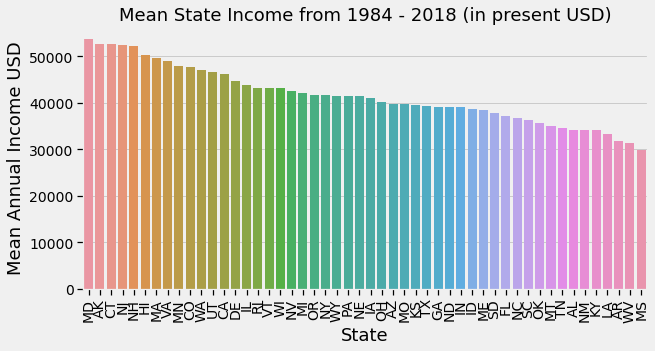

In [210]:
#Find and graph average state

plt.figure(figsize=(9, 4.5))
plt.title('Mean State Income from 1984 - 2018 (in present USD)', fontsize=18)

ax = sns.barplot(x = state_average.index, y = 'Average_State_Income', data=state_average)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

ax.set_xlabel('State', fontsize=18)
ax.set_ylabel('Mean Annual Income USD', fontsize=18)

ax.tick_params(axis='x', rotation=90)

plt.show()






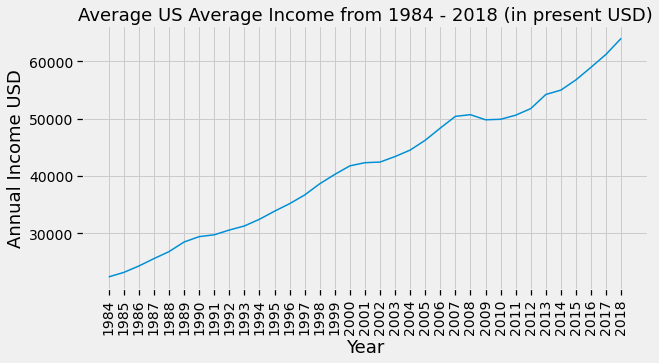

In [167]:

#Find and graph total average income by year 

plt.figure(figsize=(9, 4.5))
plt.title('Average US  Income from 1984 - 2018 (in present USD)', fontsize=18)

ax = sns.lineplot(data=year_average, x = year_average.index, y = 'Average_State_Income')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Annual Income USD', fontsize=18)

ax.tick_params(axis='x', rotation=90)

plt.show()



In [96]:
# define function to map ApprovalFY and State of Loan to average state income 

def state_income(SBA_df, income_df):
    #where 'SBA_df' is the loan dataframe and 'income_df' is the state income df
    #both dfs should have compatible dtypes
    
    result = pd.merge(SBA_df, income_df, on=["State", "ApprovalFY"])
    
    return result
    

In [97]:
merged_df = state_income(SBA_Loan, state_income_code)

In [99]:
merged_df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Average_State_Income
0,8176773007,RAFAEL'S RESTAURANT,EDINBURG,TX,78539,TEXAS ST. BANK A DIVISION OF,TX,0,16-Mar-95,1995,...,Y,NaN,30-Apr-95,"$20,000.00",$0.00,P I F,$0.00,"$20,000.00","$17,400.00","32,039"
1,7961403002,RAMADA INN,SHERMAN,TX,75090,SUNFLOWER BANK NATL ASSOC,KS,0,5-Jan-95,1995,...,N,NaN,30-Apr-95,"$931,000.00",$0.00,P I F,$0.00,"$931,000.00","$698,250.00","32,039"
2,8673183008,APPLE BEE LEARNING CNETER CORP,LAREDO,TX,78041,INTERNATIONAL BANK OF COMMERCE,TX,0,25-Sep-95,1995,...,N,NaN,31-May-98,"$165,000.00",$0.00,P I F,$0.00,"$165,000.00","$123,750.00","32,039"
3,8673123001,SHIGEMOTO & ANNETT II INC,ELGIN,TX,78621,CEN-TEX CERT. DEVEL CORP,TX,332996,25-Sep-95,1995,...,N,NaN,14-May-97,"$935,000.00",$0.00,P I F,$0.00,"$935,000.00","$935,000.00","32,039"
4,8306583008,LAKE COUNTRY PIZZA,GRAHAM,TX,76450,CIERA BANK,TX,0,2-May-95,1995,...,Y,NaN,31-Jul-95,"$25,300.00",$0.00,P I F,$0.00,"$25,300.00","$22,770.00","32,039"


In [214]:
#import inflation rate for year

inflation_year = pd.read_csv('annual_inflation_clean.csv', low_memory=False)

In [219]:
inflation_year = inflation_year.rename(columns = {'year' : 'ApprovalFY'})

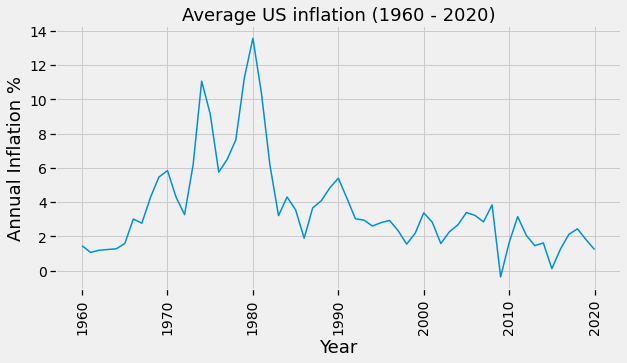

In [220]:

#plot inflation by year 

plt.figure(figsize=(9, 4.5))
plt.title('Average US inflation (1960 - 2020)', fontsize=18)

ax = sns.lineplot(data=inflation_year, x = 'ApprovalFY', y = 'inflation')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Annual Inflation %', fontsize=18)

ax.tick_params(axis='x', rotation=90)

plt.show()



In [224]:
def annual_inflation(SBA_df, inflation_df):
    #where 'SBA_df' is the loan dataframe and 'income_df' is the state income df
    #both dfs should have compatible dtypes
    inflation_df['ApprovalFY'] = inflation_df['ApprovalFY'].astype(str)
    result = pd.merge(SBA_df, inflation_df, on=["ApprovalFY"])
    
    return result

In [225]:
merged_inflation = annual_inflation(SBA_Loan, inflation_year)

In [226]:
merged_inflation

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,inflation
0,8176773007,RAFAEL'S RESTAURANT,EDINBURG,TX,78539,TEXAS ST. BANK A DIVISION OF,TX,0,16-Mar-95,1995,...,Y,NaN,30-Apr-95,"$20,000.00",$0.00,P I F,$0.00,"$20,000.00","$17,400.00",2.805420
1,7797633009,PML MARKETING,WHITEHOUSE,OH,43571,FIFTH THIRD BANK,OH,0,15-Nov-94,1995,...,Y,NaN,31-Jan-95,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$37,500.00",2.805420
2,8554903007,STEAK AND PASTA WORKS,GAINESVILLE,FL,32609,BANK OF AMERICA NATL ASSOC,FL,0,31-Jul-95,1995,...,Y,NaN,31-Oct-95,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$45,000.00",2.805420
3,8027433006,OZARK DISPOSAL SERVICE,KINGSTON,AR,72742,ARVEST BANK,AR,333319,30-Jan-95,1995,...,Y,NaN,30-Apr-95,"$15,000.00",$0.00,P I F,$0.00,"$15,000.00","$13,500.00",2.805420
4,7961403002,RAMADA INN,SHERMAN,TX,75090,SUNFLOWER BANK NATL ASSOC,KS,0,5-Jan-95,1995,...,N,NaN,30-Apr-95,"$931,000.00",$0.00,P I F,$0.00,"$931,000.00","$698,250.00",2.805420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44951,2023951001,BILLMANS RESTAURANT,SUNBURY,PA,17801,SWINEFORD NATL BANK MIDDLEBURG,PA,0,13-Sep-72,1973,...,N,20-Sep-91,NaN,$0.00,$0.00,NaN,"$25,932.00","$170,000.00","$127,500.00",6.177760
44952,2327591010,HUBERT W FAIRCHILD,CEDAREDGE,CO,81413,BANK OF THE WEST,CO,0,28-Jul-72,1973,...,N,9-Feb-93,20-Mar-73,"$80,000.00",$0.00,CHGOFF,"$10,292.00","$80,000.00","$72,000.00",6.177760
44953,7442201007,HICKORY HILLS GOLF CLUB,JACKSON,MI,49201,"FIRSTMERIT BANK, N.A.",OH,0,7-Aug-75,1976,...,N,1-Oct-02,9-Sep-76,"$350,000.00",$0.00,CHGOFF,$151.00,"$350,000.00","$315,000.00",5.744813
44954,1050561003,ADAMS MAINT SERVICE,SEATTLE,WA,98102,WEST COAST BANK,OR,0,16-Nov-71,1972,...,N,11-Feb-91,19-Nov-71,"$20,000.00",$0.00,P I F,"$3,049.00","$20,000.00","$18,000.00",3.272278
